In [1]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple, to_plot
from snn_delays.utils.test_behavior import tb_addtask_refact
# from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


V5: noisier and more realistic

In [2]:
time_window = 50
batch_size = 128 # 128: anil kag

ckpt_dir = 'copymemory_04_2025_tests'

dataset = 'copymemory_episodic'
#dataset = 'addtask' 

num_epochs = 3000 # important: epochs here refer to iteration steps

DL = DatasetLoader(dataset=dataset, caching='', 
                   dataset_size = batch_size,
                   num_workers=0, batch_size=batch_size, 
                   total_time=time_window)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

C:\Users\Alberto\Python\SNNdelays\snn_delays\datasets\sequential_datasets.py:279: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3641.)
  label[:,0] = seq[start_time:start_time + mem_length, 0].T.clone().detach()


torch.Size([128, 50, 3])
torch.Size([128, 5, 5])


In [3]:
train_loader

In [4]:
len(train_loader)

1

In [5]:
print(lbl[0])

tensor([[0.8000, 0.9000, 0.6000, 0.7000, 0.5000],
        [0.8000, 0.9000, 0.6000, 0.7000, 0.5000],
        [0.8000, 0.9000, 0.6000, 0.7000, 0.5000],
        [0.8000, 0.9000, 0.6000, 0.7000, 0.5000],
        [0.8000, 0.9000, 0.6000, 0.7000, 0.5000]])


Training copy memory task

In [6]:
num_h = 128

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
#snn_f.num_train_samples = batch_size
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
#snn_rnn.num_train_samples = batch_size
snn_rnn.to(device)

extra_kwargs = {'delay_range':(40, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
#snn_rd.num_train_samples = batch_size
snn_rd.to(device)

Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms


SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=3, out_features=128, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=5120, out_features=128, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=128, out_features=5, bias=False)
    )
  )
)

37 min

In [7]:
lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, num_epochs, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=10)
train(snn_rnn, train_loader, test_loader, 1e-3, num_epochs, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=10)
train(snn_rd, train_loader, test_loader, 1e-3, num_epochs, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=10)

Mean Error: 0.0004953516181558371% 
--------------------------
Epoch [1/3000], learning_rates 0.001000, 1.000000
Step [1/1], Loss: 0.33603
128
Time elasped: 0.850513219833374
Epoch [2/3000], learning_rates 0.001000, 1.000000
Step [1/1], Loss: 10.35419
128
Time elasped: 0.24068045616149902
Epoch [3/3000], learning_rates 0.001000, 1.000000
Step [1/1], Loss: 0.69544
128
Time elasped: 0.21925997734069824
Epoch [4/3000], learning_rates 0.001000, 1.000000
Step [1/1], Loss: 0.33632
128
Time elasped: 0.18001770973205566
Epoch [5/3000], learning_rates 0.001000, 1.000000
Step [1/1], Loss: 0.17958
128
Time elasped: 0.21988201141357422
Mean Error: 0.0010273103835061193% 
--------------------------
Epoch [6/3000], learning_rates 0.001000, 1.000000
Step [1/1], Loss: 0.13241
128
Time elasped: 0.18160367012023926
Epoch [7/3000], learning_rates 0.001000, 1.000000
Step [1/1], Loss: 0.10896
128
Time elasped: 0.22149014472961426
Epoch [8/3000], learning_rates 0.001000, 1.000000
Step [1/1], Loss: 0.09990
1

Text(0.5, 1.0, 'train loss')

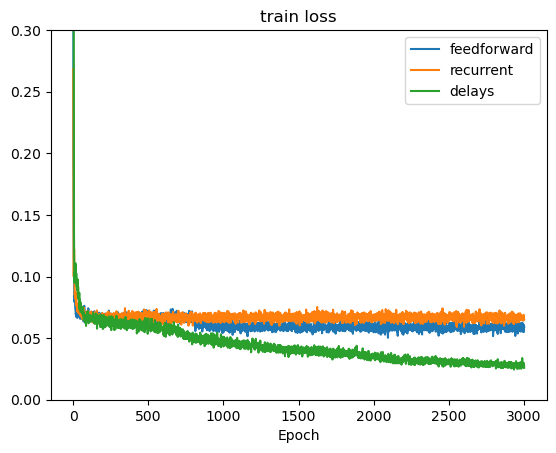

In [8]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')

plt.ylim(0, 0.3)
plt.title('train loss')

In [9]:
snn_f.debug = True
snn_rnn.debug = True
snn_rd.debug = True
snn_f.init_state_logger()
snn_rnn.init_state_logger()
snn_rd.init_state_logger()

from snn_delays.utils.train_utils_refact_minimal import propagate_batch_simple
images, labels_mf = propagate_batch_simple(snn_f, test_loader)
_, labels_rnn = propagate_batch_simple(snn_rnn, test_loader)
_, labels_rd = propagate_batch_simple(snn_rd, test_loader)

In [10]:
ref_mf = labels_mf[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_mf = snn_f.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rnn = labels_rnn[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_rnn = snn_rnn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rd = labels_rd[:,:int(0.1*time_window),:].permute(1, 0, 2).cpu().numpy()
out_rd = snn_rd.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

In [11]:
print(np.abs(ref_mf - out_mf).sum())
print(np.abs(ref_rnn - out_rnn).sum())
print(np.abs(ref_rd - out_rd).sum())

661.55994
720.9131
416.53506


In [12]:
from snn_delays.utils.visualization_utils import plot_add_task, plot_add_task2, plot_add_task3, plot_add_task4
# Create a figure with 3 rows and N columns (for stacking results horizontally)

def plot_add_task(output, reference, N, axes=None, name=''):
    

    ns = 50 # num samples to display for better viz

    ref = reference[:, :ns , N]
    out = output[:, :ns , N]
    diff = abs(ref-out)

    print(np.mean(diff))

    if axes is None:
        fig, axes = plt.subplots(3, 1, figsize=(5, 10))  # Create a new figure if axes not provided

    axes[0].imshow(ref, vmin=0, vmax=0.9)
    axes[0].set_title('Reference '+name)
    axes[0].set_ylabel('Time')

    axes[1].imshow(out, vmin=0, vmax=0.9)
    axes[1].set_title('Output')
    axes[1].set_ylabel('Time')

    axes[2].imshow(diff, vmin=0.0, vmax=1.0)
    axes[2].set_title('Difference')
    axes[2].set_ylabel('Time')
    axes[2].set_xlabel('Training Sample')

    return axes  # Return the axes to be used in an external figure

0.2087092
0.2499079
0.13652068


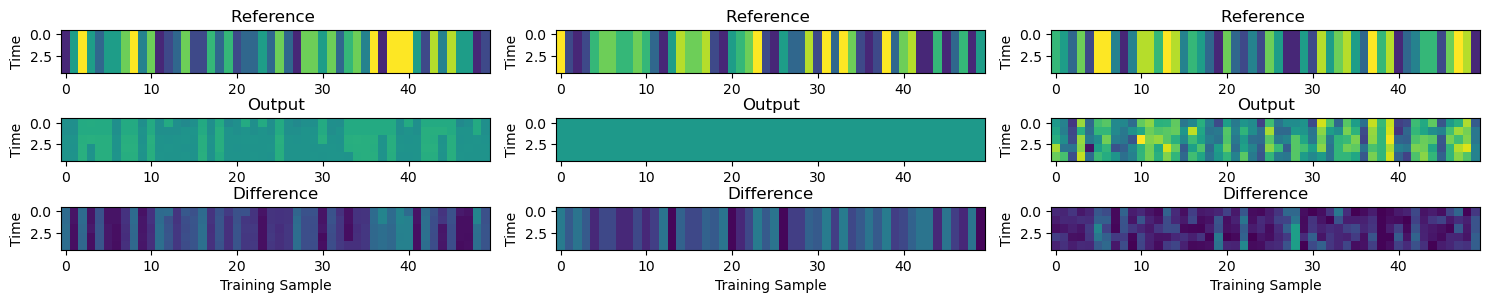

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 0, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 0, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 0, axes[:, 2])  

plt.tight_layout()
plt.show()

0.2150098
0.22811036
0.15741517


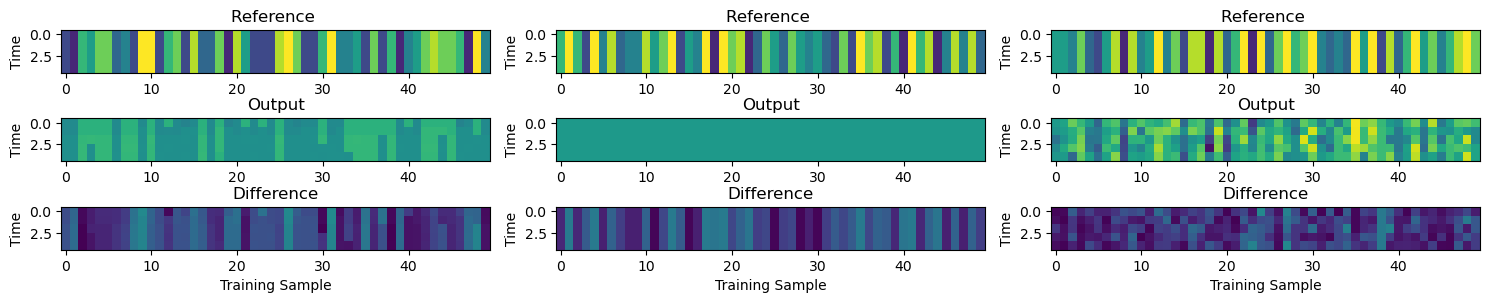

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 1, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 1, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 1, axes[:, 2])  

plt.tight_layout()
plt.show()

0.21644232
0.21513623
0.14535967


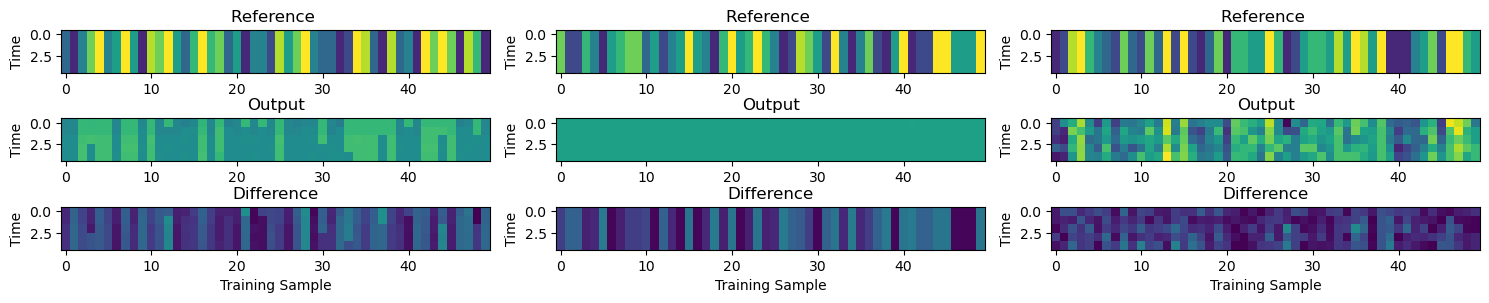

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 2, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 2, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 2, axes[:, 2])  

plt.tight_layout()
plt.show()

0.21923643
0.20317028
0.1449566


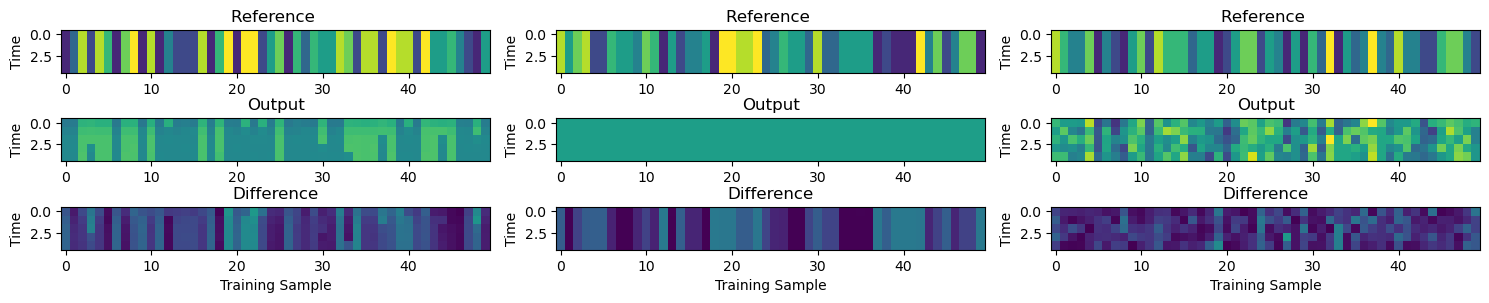

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 3, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 3, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 3, axes[:, 2])  

plt.tight_layout()
plt.show()

0.2132532
0.20638739
0.05431114


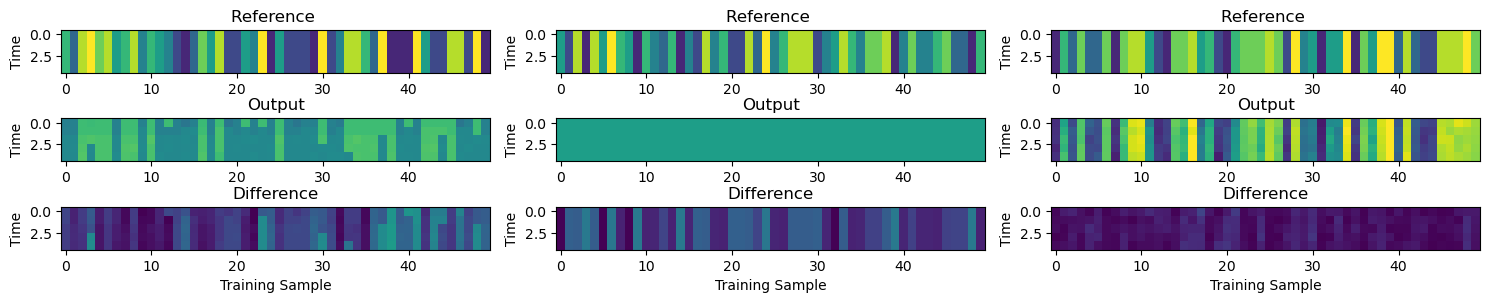

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 4, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 4, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 4, axes[:, 2])  

plt.tight_layout()
plt.show()